In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

In [4]:
PROJECT_ROOT = Path().resolve()

while not (PROJECT_ROOT / "data").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

# Build correct file path
file_path = PROJECT_ROOT / "data" / "processed" / "nifty50_technical.csv"

In [5]:
df = pd.read_csv(file_path, low_memory=False)
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Stock,SMA_20,SMA_50,Returns,Volatility_20,RSI_14
0,49,2010-03-17,62.931767,62.931767,61.045598,61.383320,2145365,ADANIENT.NS,62.723070,61.305704,-0.010985,0.017992,43.992128
1,50,2010-03-18,63.454278,63.454278,60.535811,61.173035,680293,ADANIENT.NS,62.476784,61.378092,-0.003426,0.014782,45.640305
2,51,2010-03-19,59.898595,61.523501,59.898595,61.185780,919288,ADANIENT.NS,62.325126,61.424099,0.000208,0.013606,45.566186
3,52,2010-03-22,61.045597,61.045597,59.012865,59.350594,1875340,ADANIENT.NS,62.141607,61.317174,-0.029994,0.014527,38.523666
4,53,2010-03-23,59.516264,60.217203,58.133500,59.223145,582769,ADANIENT.NS,61.967965,61.261099,-0.002147,0.014518,30.384555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174830,177231,2024-12-24,288.250678,289.844270,283.844884,286.188385,8837902,WIPRO.NS,283.223885,269.723911,-0.008444,0.011732,64.986706
174831,177232,2024-12-26,286.282136,287.735125,284.969781,285.954041,6516148,WIPRO.NS,283.861316,270.291507,-0.000819,0.011398,58.805488
174832,177233,2024-12-27,286.094662,291.437828,285.625962,289.750519,8063921,WIPRO.NS,284.939325,271.090641,0.013277,0.010536,66.906469
174833,177234,2024-12-30,289.750526,290.031734,283.704280,284.688568,13709891,WIPRO.NS,285.631830,271.796034,-0.017470,0.011457,49.925918


In [6]:
stock = "RELIANCE.NS"

stock_df = df[df["Stock"] == stock].copy()
stock_df = stock_df.sort_values("Date")
stock_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Stock,SMA_20,SMA_50,Returns,Volatility_20,RSI_14
132934,134796,2010-03-17,218.450838,220.015843,216.621605,217.414276,21599472,RELIANCE.NS,204.532919,210.169285,0.001639,0.017961,73.770908
132935,134797,2010-03-18,218.288270,219.832951,216.276119,218.887848,15292424,RELIANCE.NS,204.984132,210.175180,0.006778,0.017773,81.149170
132936,134798,2010-03-19,219.263824,222.861304,217.505726,221.956863,19737747,RELIANCE.NS,205.941938,210.261968,0.014021,0.015790,81.071458
132937,134799,2010-03-22,215.849235,223.369395,215.849235,218.278046,20468483,RELIANCE.NS,206.864175,210.204855,-0.016574,0.015920,73.168221
132938,134800,2010-03-23,219.091080,222.343049,218.887838,221.824768,20005544,RELIANCE.NS,208.017102,210.145304,0.016249,0.015946,69.394278


In [8]:
stock_df["Target"] = stock_df["Close"].shift(-1)
stock_df = stock_df.dropna()

In [9]:
features = [
    "SMA_20",
    "SMA_50",
    "RSI_14",
    "Volatility_20",
    "Returns"
]

X = stock_df[features]
y = stock_df["Target"]


In [10]:
split = int(len(X) * 0.8)

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]


In [11]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [12]:
preds = model.predict(X_test)


In [13]:
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 123.17461054987248
RMSE: 176.02708810941573


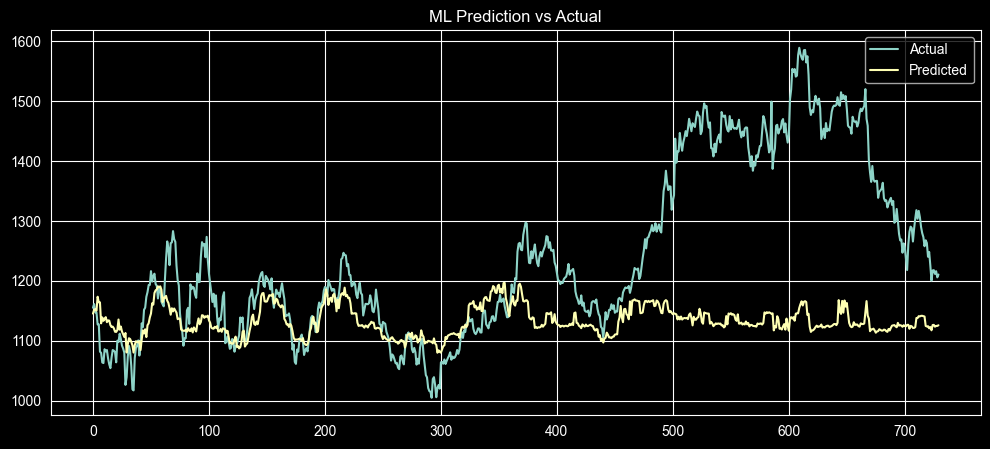

In [14]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(preds, label="Predicted")
plt.legend()
plt.title("ML Prediction vs Actual")
plt.show()


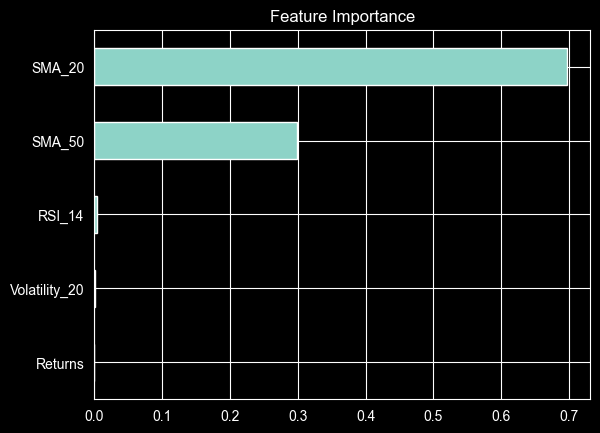

In [15]:
importance = pd.Series(
    model.feature_importances_,
    index=features
).sort_values()

importance.plot(kind="barh")
plt.title("Feature Importance")
plt.show()
